Shape of dataset: (44424, 10)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB
None

Missing values:

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season          

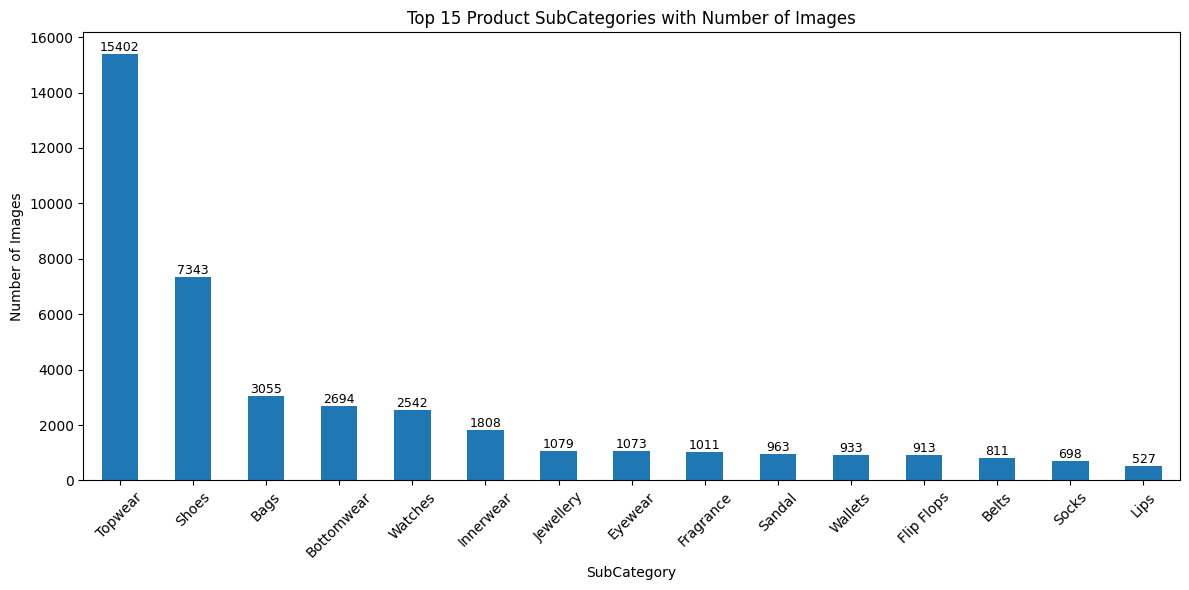

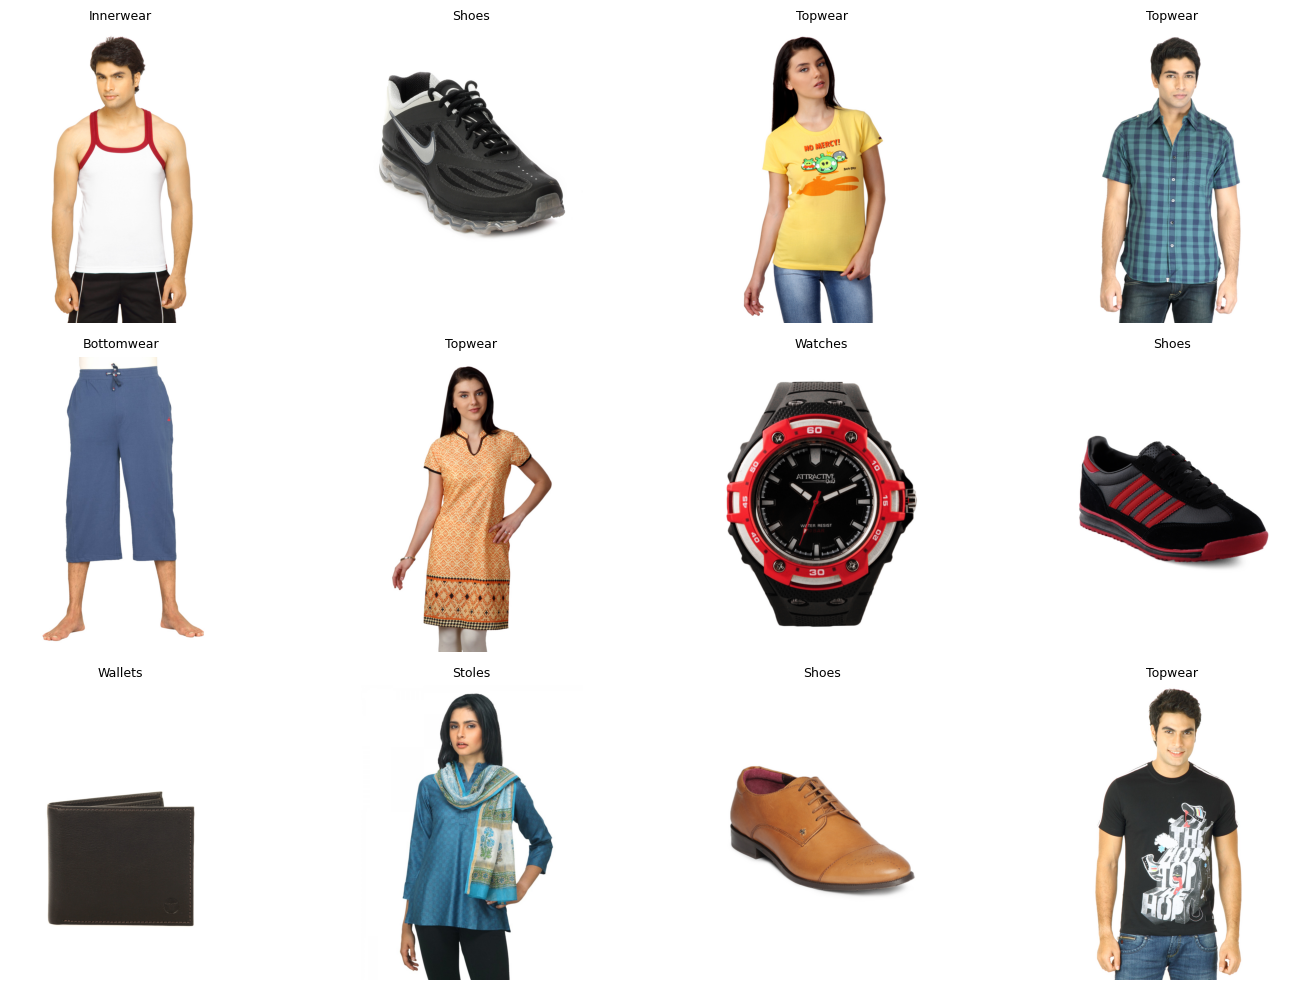


Duplicate rows: 0

Gender distribution:
 gender
Men       22147
Women     18631
Unisex     2161
Boys        830
Girls       655
Name: count, dtype: int64


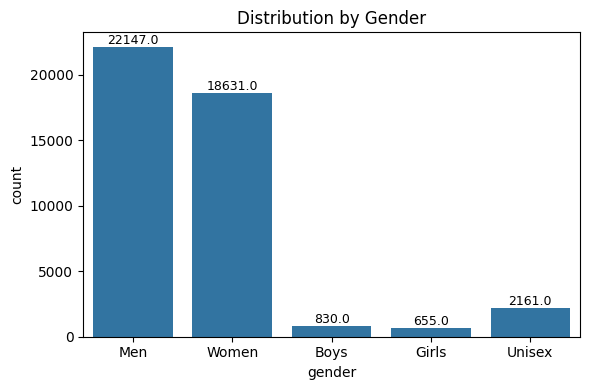


Top base colours:
 baseColour
Black        9728
White        5538
Blue         4918
Brown        3494
Grey         2741
Red          2455
Green        2115
Pink         1860
Navy Blue    1789
Purple       1640
Name: count, dtype: int64


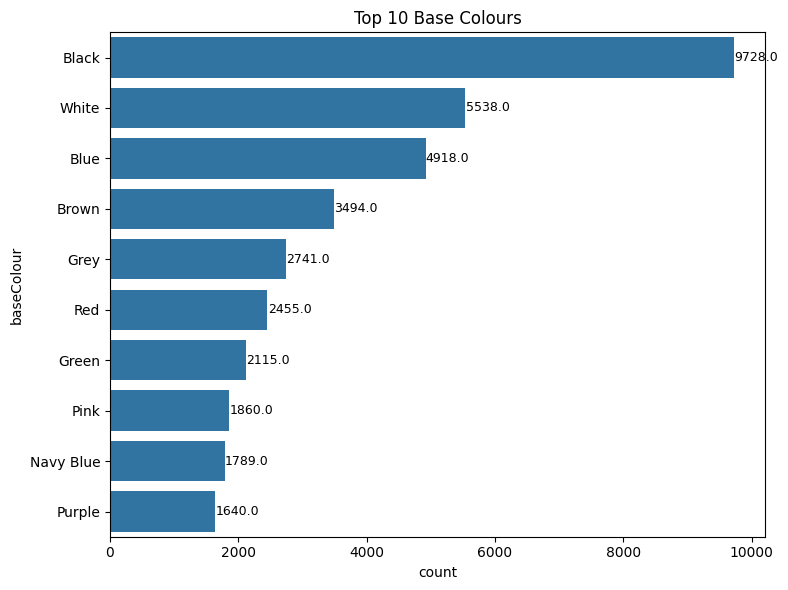

In [ ]:
##################################### Data Analysis ############################################################

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# File paths
csv_path = '/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv'
image_dir = '/kaggle/input/fashion-product-images-dataset/fashion-dataset/images'

# Load CSV
df = pd.read_csv(csv_path, on_bad_lines='skip')

# Basic info
print("Shape of dataset:", df.shape)
print("\nDataset Info:\n")
print(df.info())
print("\nMissing values:\n")
print(df.isnull().sum())

# Preview data
print("\nFirst 5 rows:\n")
print(df.head())

# Drop rows with missing images
df = df.dropna(subset=['id'])

# Convert id to string to match image file names
df['id'] = df['id'].astype(str)

# Sample unique categories
print("\nUnique product categories:\n", df['subCategory'].unique())

# -----------------------------
# Print number of unique classes
# -----------------------------

print("\nNumber of unique subCategories:", df['subCategory'].nunique())
print("Number of unique genders:", df['gender'].nunique() if 'gender' in df.columns else "N/A")
print("Number of unique baseColours:", df['baseColour'].nunique() if 'baseColour' in df.columns else "N/A")

# -----------------------------
# Print number of images in each class (subCategory)
# -----------------------------

# Count number of images in each subCategory
sub_category_counts = df['subCategory'].value_counts()

# Print the number of images for each subCategory
print("\nNumber of images in each subCategory:")
print(sub_category_counts)

# -----------------------------
# Plot number of images in each subCategory
# -----------------------------

plt.figure(figsize=(12, 6))
ax = sub_category_counts.head(15).plot(kind='bar')
plt.title("Top 15 Product SubCategories with Number of Images")
plt.xlabel("SubCategory")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

# -----------------------------
# Display sample images
# -----------------------------

def show_images(df, num=12):
    sample_df = df.sample(num)
    plt.figure(figsize=(15, 10))
    for idx, row in enumerate(sample_df.iterrows()):
        img_path = os.path.join(image_dir, row[1]['id'] + ".jpg")
        try:
            img = Image.open(img_path)
            plt.subplot(3, 4, idx + 1)
            plt.imshow(img)
            plt.title(row[1]['subCategory'], fontsize=9)
            plt.axis('off')
        except:
            continue
    plt.tight_layout()
    plt.show()

show_images(df)

# -----------------------------
# Check for duplicates
# -----------------------------
print("\nDuplicate rows:", df.duplicated().sum())

# -----------------------------
# Check most common gender items with count labels
# -----------------------------
if 'gender' in df.columns:
    print("\nGender distribution:\n", df['gender'].value_counts())
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=df, x='gender')
    plt.title('Distribution by Gender')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    plt.show()

# -----------------------------
# Check most common base colors with count labels
# -----------------------------
if 'baseColour' in df.columns:
    print("\nTop base colours:\n", df['baseColour'].value_counts().head(10))
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=df[df['baseColour'].notnull()],
                       y='baseColour',
                       order=df['baseColour'].value_counts().head(10).index)
    plt.title('Top 10 Base Colours')
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(f'{width}', (width + 5, p.get_y() + p.get_height() / 2.),
                    va='center', fontsize=9)
    plt.tight_layout()
    plt.show()


In [ ]:
# ------------------------------
###################################### Data Clean ############################################################

# ------------------------------

# Print before cleaning
print("Before cleaning:")
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())

# ------------------------------
# CLEANING PROCESS
# ------------------------------

# Drop rows with missing essential fields (must-have for image and category analysis)
essential_cols = ['id', 'gender', 'masterCategory', 'subCategory', 'articleType']
df = df.dropna(subset=essential_cols)

# Convert 'id' to string
df['id'] = df['id'].astype(str)

# Strip and lowercase for consistency
for col in ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'usage']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()

# Fill missing baseColour with 'unknown' (only 15 missing)
df['baseColour'] = df['baseColour'].fillna('unknown')

# Fill missing season with 'unknown' (only 21 missing)
df['season'] = df['season'].fillna('unknown')

# Fill missing year with most frequent value (only 1 missing)
df['year'] = df['year'].fillna(df['year'].mode()[0])

# Fill missing usage with 'unknown' (317 missing — reasonable to keep)
df['usage'] = df['usage'].fillna('unknown')

# Fill missing productDisplayName with empty string
df['productDisplayName'] = df['productDisplayName'].fillna('')

# Drop duplicates if any
df = df.drop_duplicates().reset_index(drop=True)

# ------------------------------
# PRINT AFTER CLEANING
# ------------------------------
print("\nAfter cleaning:")
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())


Before cleaning:
Shape: (44424, 10)
Missing values:
 id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

After cleaning:
Shape: (44424, 10)
Missing values:
 id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64



Number of images in each subCategory:
subCategory
Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         

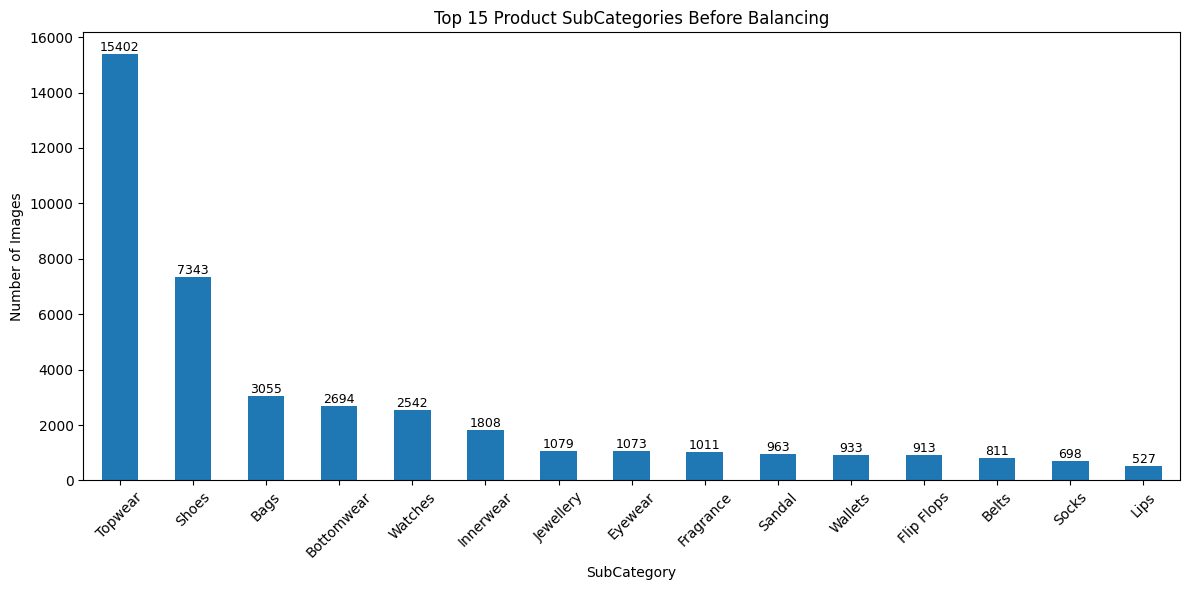


Number of images in each subCategory after filtering out low count classes:
subCategory
Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                 

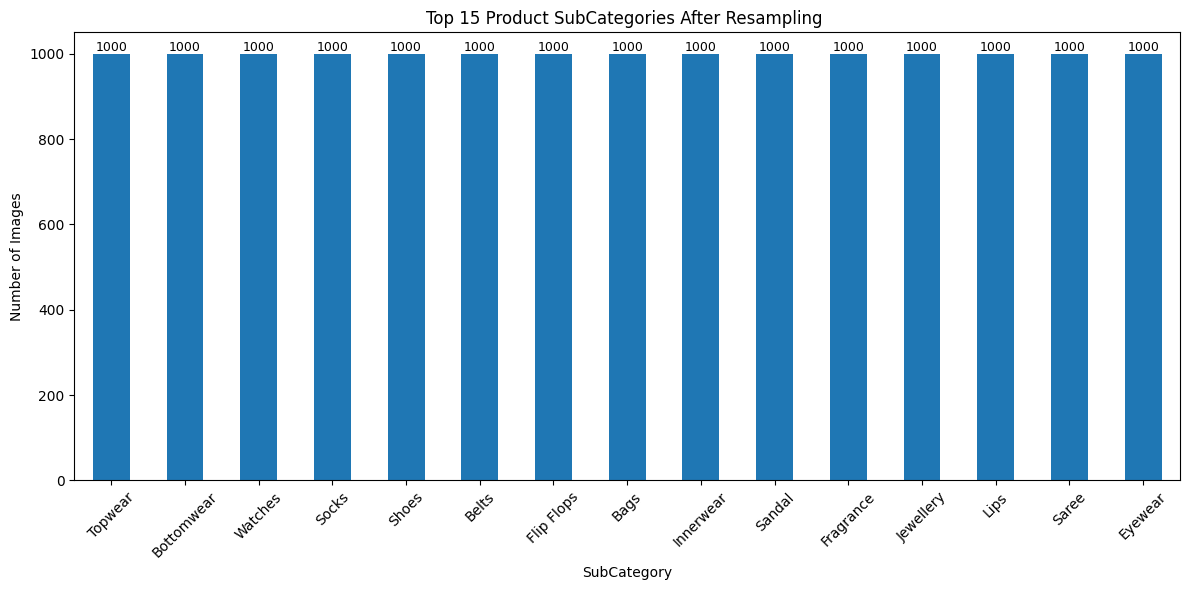

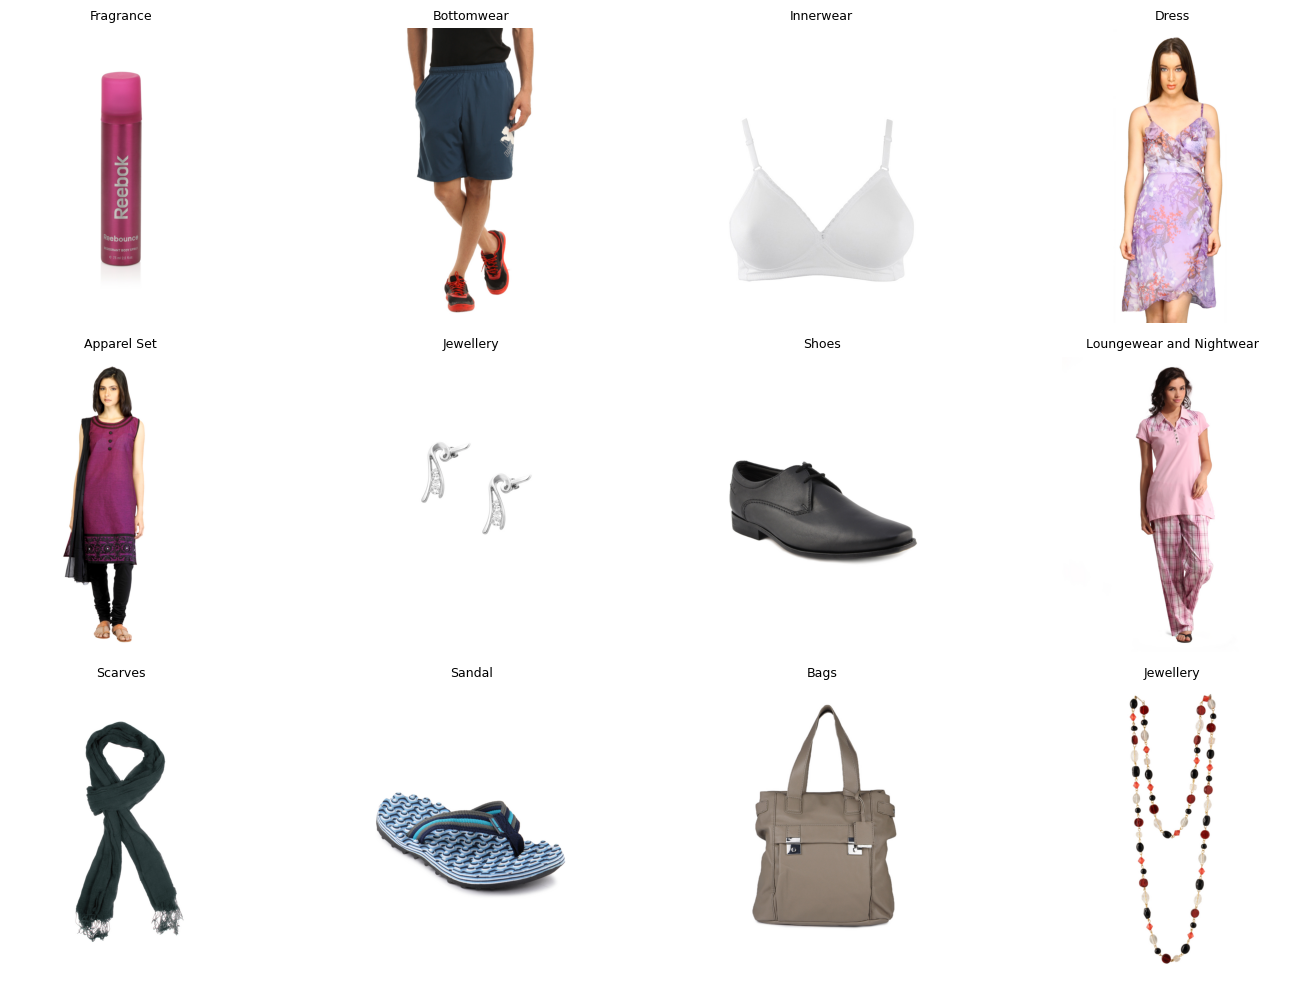

In [ ]:
import os   #############################  Balance dataset ########################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.utils import resample

# File paths
csv_path = '/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv'
image_dir = '/kaggle/input/fashion-product-images-dataset/fashion-dataset/images'

# Load CSV
df = pd.read_csv(csv_path, on_bad_lines='skip')

# Drop rows with missing images
df = df.dropna(subset=['id'])

# Convert id to string to match image file names
df['id'] = df['id'].astype(str)

# -----------------------------
# Number of images in each subCategory
# -----------------------------

# Count number of images in each subCategory
sub_category_counts = df['subCategory'].value_counts()

# Print the number of images for each subCategory
print("\nNumber of images in each subCategory:")
print(sub_category_counts)

# -----------------------------
# Plot distribution before balancing
# -----------------------------
plt.figure(figsize=(12, 6))
ax = sub_category_counts.head(15).plot(kind='bar')
plt.title("Top 15 Product SubCategories Before Balancing")
plt.xlabel("SubCategory")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

# -----------------------------
# Remove classes with low counts
# -----------------------------


min_class_size = 100 

# Filter out subCategories with fewer images than the threshold
df_filtered = df[df['subCategory'].isin(sub_category_counts[sub_category_counts >= min_class_size].index)]

# Check the new class distribution
print("\nNumber of images in each subCategory after filtering out low count classes:")
print(df_filtered['subCategory'].value_counts())

# -----------------------------
# Resample the classes 
# -----------------------------

# Define the target size for resampling
target_class_size =1000 

# List of all subCategories to resample
sub_categories = df_filtered['subCategory'].unique()

# Create an empty list to collect the resampled data
resampled_df_list = []

# For each subcategory, resample to match the target class size 
for subcategory in sub_categories:
    subcategory_data = df_filtered[df_filtered['subCategory'] == subcategory]
    # Resample this subcategory to the target class size 
    subcategory_data_resampled = resample(subcategory_data,
                                          replace=True,  # Resample with replacement (both upsampling and downsampling)
                                          n_samples=target_class_size,  
                                          
                                          random_state=42)  # Set random seed for reproducibility
    resampled_df_list.append(subcategory_data_resampled)

# Concatenate all the resampled data into one DataFrame
df_resampled = pd.concat(resampled_df_list)

# Check the new class distribution after resampling
print("\nNumber of images in each subCategory after resampling ")
print(df_resampled['subCategory'].value_counts())

# -----------------------------
# Plot distribution after resampling
# -----------------------------
plt.figure(figsize=(12, 6))
ax = df_resampled['subCategory'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Product SubCategories After Resampling ")
plt.xlabel("SubCategory")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

# -----------------------------
# Display sample images from resampled data
# -----------------------------

def show_images(df, num=12):
    sample_df = df.sample(num)
    plt.figure(figsize=(15, 10))
    for idx, row in enumerate(sample_df.iterrows()):
        img_path = os.path.join(image_dir, row[1]['id'] + ".jpg")
        try:
            img = Image.open(img_path)
            plt.subplot(3, 4, idx + 1)
            plt.imshow(img)
            plt.title(row[1]['subCategory'], fontsize=9)
            plt.axis('off')
        except:
            continue
    plt.tight_layout()
    plt.show()

show_images(df_resampled)


In [ ]:
import tensorflow as tf################data Proseeing and split ##########################################
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import os

# -----------------------------
# Fast Data Pipeline using TensorFlow
# -----------------------------

# Function to load and preprocess images (resize and normalize) with TensorFlow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = tf.io.read_file(image_path)  # Read the image file
    img = tf.image.decode_jpeg(img, channels=3)  # Decode image into a tensor
    img = tf.image.resize(img, target_size)  # Resize the image
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

# -----------------------------
# Optimized Data Pipeline
# -----------------------------

# Ensure 'image_path' column exists
df_resampled['image_path'] = df_resampled['id'].apply(
    lambda x: os.path.join('/path/to/images/directory', f"{x}.jpg")
)

# Create TensorFlow Dataset object for images and labels
image_paths = df_resampled['image_path'].values
labels = df_resampled['subCategory'].values

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = to_categorical(labels_encoded)

# Create the dataset
dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels_one_hot))

# Map the preprocessing function to the dataset
dataset = dataset.map(lambda x, y: (load_and_preprocess_image(x), y), num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Shuffle, batch, cache, and prefetch for optimal performance
batch_size = 128
dataset = (dataset
           .shuffle(len(df_resampled))  # Shuffle the data
           .batch(batch_size)  # Batch the data
           .cache()  # Cache the data in memory
           .prefetch(tf.data.experimental.AUTOTUNE))  # Prefetch for performance

# -----------------------------
# Train-Validation-Test Split (70% Train, 15% Validation, 15% Test)
# -----------------------------

# Calculate the sizes for train, validation, and test
train_size = int(0.7 * len(df_resampled))
val_size = int(0.15 * len(df_resampled))

# Split dataset into train, validation, and test datasets
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size + val_size)

# -----------------------------
# Print the sizes of each set
# -----------------------------

print(f"Training set size: {train_size}")
print(f"Validation set size: {val_size}")
print(f"Test set size: {len(df_resampled) - train_size - val_size}")


I0000 00:00:1746525304.467935      10 service.cc:148] XLA service 0x565656659470 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746525304.467992      10 service.cc:156]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1746525304.467996      10 service.cc:156]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1746525304.468000      10 service.cc:156]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1746525304.468002      10 service.cc:156]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1746525304.468005      10 service.cc:156]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1746525304.468008      10 service.cc:156]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1746525304.468011      10 service.cc:156]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1746525304.468014      10 service.cc:156]   StreamExecutor device (7): TPU, 2a886c8


Training set size: 18900
Validation set size: 4050
Test set size: 4050


In [ ]:
import pandas as pd########################  load model and feature extract
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
tf.config.run_functions_eagerly(True)


# Add image path column to the resampled DataFrame
df_resampled['image_path'] = df_resampled['id'].apply(
    lambda x: os.path.join('/kaggle/input/fashion-product-images-dataset/fashion-dataset/images', f"{x}.jpg"))

# Load pre-trained MobileNetV3 model (without the top layer)
base_model = MobileNetV3Large(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
model = Model(inputs=base_model.input, outputs=x)
model.trainable = False

# Function to load and preprocess images
def preprocess_image(image_path, target_size=(224, 224)):
    try:
        img = image.load_img(image_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        return preprocess_input(img_array)
    except:
        return None

# Function to extract features from an image
def extract_image_features(image_path):
    img = preprocess_image(image_path)
    if img is None:
        return np.zeros((1024,))  # Dummy vector if image fails
    features = model.predict(img, verbose=0)  
    return features.flatten()

# Function to extract features from a batch of images
def extract_batch_features(preprocessed_images):
    if not preprocessed_images:
        return []
    batch_input = np.vstack(preprocessed_images)
    features = model.predict(batch_input, verbose=0)
    return features

# Extract image features in batches for faster processing
batch_size = 2000  
features_list = []
valid_indices = []

# Prepare batches
total_images = len(df_resampled)
num_batches = (total_images + batch_size - 1) // batch_size  # Ceiling division

print("Processing all images in batches...")
with tqdm(total=total_images, desc="Processing Images", ncols=100) as pbar:
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min(start_idx + batch_size, total_images)
        batch_paths = df_resampled['image_path'].iloc[start_idx:end_idx].tolist()
        
        # Process each image in the batch
        batch_features = []
        batch_valid_indices = []
        
        # Preprocess all images in the batch
        valid_images = []
        valid_batch_indices = []
        
        for i, path in enumerate(batch_paths):
            img = preprocess_image(path)
            if img is not None:
                valid_images.append(img)
                valid_batch_indices.append(start_idx + i)
        
        # If we have valid images, make batch prediction
        if valid_images:
            batch_input = np.vstack(valid_images)
            batch_predictions = model.predict(batch_input, verbose=0)
            
            # Add results to our lists
            for i, features in enumerate(batch_predictions):
                features_list.append(features)
                valid_indices.append(valid_batch_indices[i])
        
        # Update progress bar with batch size
        pbar.update(end_idx - start_idx)

# Filter df_resampled to include only successfully processed images
df_resampled = df_resampled.iloc[valid_indices].reset_index(drop=True)
df_resampled['image_features'] = features_list




Processing all images in batches...


Processing Images: 100%|██████████████████████████████████████| 27000/27000 [14:47<00:00, 30.43it/s]


Please enter your preferences:


Gender (Men/Women):  men



Choose a Subcategory from the following options:
1. Topwear
2. Watches
3. Bags
4. Shoes
5. Dress
6. Bottomwear
7. Accessories
8. Eyewear
9. Scarves


Enter the number corresponding to your choice:  4
Usage (e.g., Casual, Party, Sports):  sports



Recommendations based on profile: {'gender': 'men', 'subCategory': 'Shoes', 'usage': 'sports'}


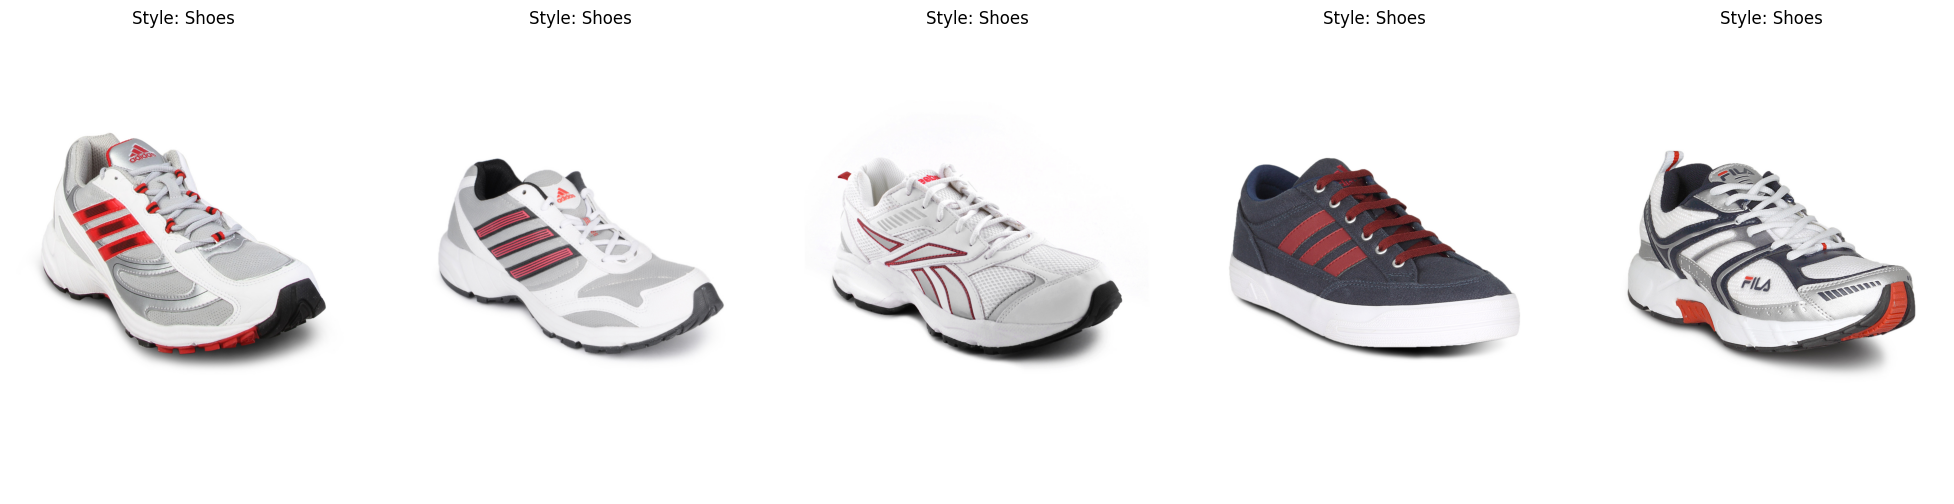

In [ ]:
import os # Recommandation 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity

# -----------------------------
# Function to get similar products based on user input preferences
# -----------------------------
def get_similar_items_by_user_info(gender=None, subCategory=None, usage=None, top_n=5):
    filtered_df = df_resampled.copy()

    if gender:
        filtered_df = filtered_df[filtered_df['gender'].str.contains(gender, case=False, na=False)]
    if subCategory:
        filtered_df = filtered_df[filtered_df['subCategory'].str.contains(subCategory, case=False, na=False)]
    if usage:
        filtered_df = filtered_df[filtered_df['usage'].str.contains(usage, case=False, na=False)]

    if filtered_df.empty:
        print("No items found for this profile.")
        return np.array([]), np.array([])

    filtered_image_features = np.vstack(filtered_df['image_features'].values)
    sample_product_features = filtered_image_features[0].reshape(1, -1)
    similarities = cosine_similarity(sample_product_features, filtered_image_features)
    similar_items = np.argsort(similarities[0])[::-1]

    # Remove duplicates by ID
    seen_ids = set()
    unique_items = []
    for idx in similar_items:
        item_id = filtered_df.iloc[idx]['id']
        if item_id not in seen_ids:
            seen_ids.add(item_id)
            unique_items.append(idx)
        if len(unique_items) >= top_n + 1:  # +1 to skip the first (itself)
            break

    # Skip the first item (the input item itself)
    unique_items = unique_items[1:top_n+1]

    similar_product_ids = filtered_df.iloc[unique_items]['id'].values
    similar_styles = filtered_df.iloc[unique_items]['subCategory'].values
    return similar_product_ids, similar_styles

# -----------------------------
# Function to display the recommended products
# -----------------------------
def display_recommendations(product_ids, styles, top_n=5):
    fig, axes = plt.subplots(1, top_n, figsize=(20, 5))
    for i, item_id in enumerate(product_ids):
        img_path = os.path.join('/contents/input/fashion-product-images-dataset/fashion-dataset/images', f"{item_id}.jpg")
        try:
            img = Image.open(img_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(f"Style: {styles[i]}")
        except:
            axes[i].axis('off')
            axes[i].set_title("Image not found")
    plt.tight_layout()
    plt.show()

# -----------------------------
# Function to get user input with limited subcategories
# -----------------------------
def get_user_input():
    print("Please enter your preferences:")

    gender = input("Gender (Men/Women): ").strip()

    # Choose subcategories (added 'Accessories', 'Eyewear', and 'Scarves')
    subcategories = ['Topwear', 'Watches', 'Bags', 'Shoes', 'Dress', 'Bottomwear', 'Accessories', 'Eyewear', 'Scarves']  
    print("\nChoose a Subcategory from the following options:")
    for i, subcat in enumerate(subcategories, 1):
        print(f"{i}. {subcat}")
    
    subcat_choice = input("Enter the number corresponding to your choice: ").strip()
    try:
        subCategory = subcategories[int(subcat_choice) - 1]
    except (IndexError, ValueError):
        print("Invalid choice. Defaulting to 'Topwear'.")
        subCategory = 'Topwear'

    usage = input("Usage (e.g., Casual, Party, Sports): ").strip()
    
    return {'gender': gender, 'subCategory': subCategory, 'usage': usage}

# -----------------------------
# Function to recommend clothing based on user profile
# -----------------------------
def recommend_clothing(user_info, top_n=5):
    print(f"\nRecommendations based on profile: {user_info}")
    recommended_ids, recommended_styles = get_similar_items_by_user_info(**user_info, top_n=top_n)
    if len(recommended_ids) == 0:
        print("No recommendations found.")
        return
    display_recommendations(recommended_ids, recommended_styles, top_n)

# -----------------------------
# Main function to run the recommendation system
# -----------------------------
def recommend_clothing_based_on_input(top_n=5):
    user_info = get_user_input()
    recommend_clothing(user_info, top_n)

# -----------------------------
# Run the system
# -----------------------------
recommend_clothing_based_on_input(top_n=5)
